In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [5]:
results_dir = Path("results") / "husky"
values = np.load(results_dir / "results_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
values

{'pred': array([0, 0, 0, ..., 4, 4, 4]),
 'true': array([0, 0, 0, ..., 4, 4, 4]),
 'conf': array([[9.69042540e-01, 7.06377341e-06, 1.63276628e-08, 2.10884437e-02,
         9.86196008e-03],
        [9.99699354e-01, 2.52488171e-05, 1.73511653e-04, 1.30633467e-07,
         1.01800586e-04],
        [9.99972701e-01, 4.74988863e-13, 1.84818845e-07, 8.09585246e-11,
         2.71061090e-05],
        ...,
        [6.36303157e-05, 4.96141756e-12, 2.57682697e-09, 1.49878088e-06,
         9.99934793e-01],
        [3.77689512e-03, 7.04396200e-07, 4.82874611e-06, 1.05024412e-06,
         9.96216476e-01],
        [6.52845996e-03, 2.25365711e-05, 8.89290031e-03, 1.44576479e-04,
         9.84411538e-01]], dtype=float32),
 'ftime': array([], dtype=float64),
 'ptime': array([], dtype=float64),
 'channels': {'imu': {'wx': True,
   'wy': True,
   'wz': True,
   'ax': True,
   'ay': True,
   'az': True},
  'pro': {'velL': True, 'velR': True, 'curL': True, 'curR': True}},
 'terrains': ['ASPHALT', 'FLOORING',

In [6]:
clf_values = values
# clf_values = values[1700]
ypred = clf_values["pred"]
ytest = clf_values["true"]
terr_pred = terrains[ypred]
terr_test = terrains[ytest]

Text(0.5, 1.0, 'husky')

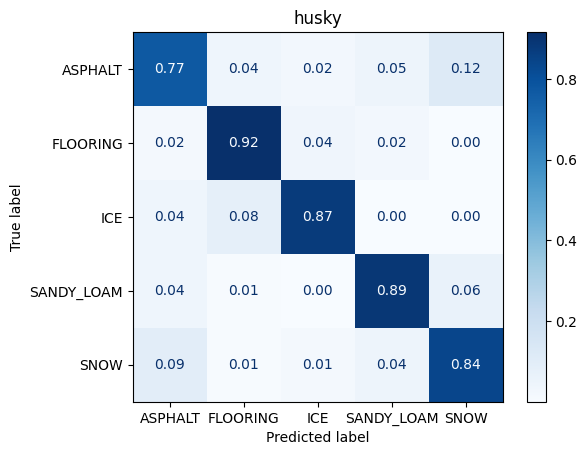

In [7]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    normalize="true",
    values_format=".2f",
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

Text(0.5, 1.0, 'husky')

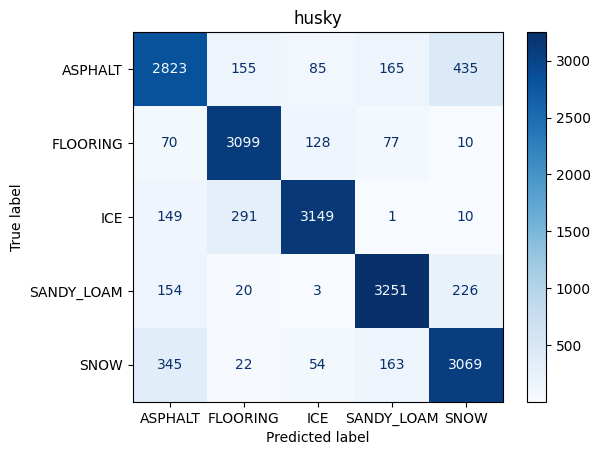

In [8]:
disp = ConfusionMatrixDisplay.from_predictions(
    terr_test,
    terr_pred,
    labels=terrains,
    display_labels=terrains,
    cmap="Blues",
)
disp.ax_.set_title(results_dir.stem)

In [6]:
metrics = pd.Series(
    {
        "accuracy": accuracy_score(
            ytest,
            ypred,
        ),
        "precision": precision_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "recall": recall_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
        "f1-score": f1_score(
            ytest,
            ypred,
            labels=terrains,
            average=None,
        ),
    }
)

In [7]:
metrics

accuracy                                                   0.7
precision    [0.7890625, 0.7800925925925926, 0.921621621621...
recall       [0.5738636363636364, 0.6382575757575758, 0.710...
f1-score     [0.6644736842105263, 0.7020833333333333, 0.802...
dtype: object